In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [3]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)
X, Y = np.meshgrid(x, y)

In [4]:
X

array([[0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
        5.        ],
       [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
        5.        ],
       [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
        5.        ],
       ...,
       [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
        5.        ],
       [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
        5.        ],
       [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
        5.        ]])

In [5]:
Y

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.10204082, 0.10204082, 0.10204082, ..., 0.10204082, 0.10204082,
        0.10204082],
       [0.20408163, 0.20408163, 0.20408163, ..., 0.20408163, 0.20408163,
        0.20408163],
       ...,
       [4.79591837, 4.79591837, 4.79591837, ..., 4.79591837, 4.79591837,
        4.79591837],
       [4.89795918, 4.89795918, 4.89795918, ..., 4.89795918, 4.89795918,
        4.89795918],
       [5.        , 5.        , 5.        , ..., 5.        , 5.        ,
        5.        ]])

In [6]:
Z = f(X, Y)

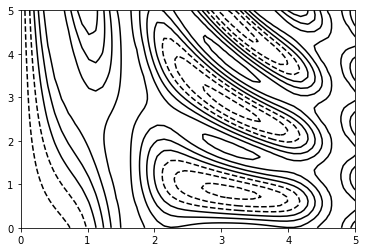

In [7]:
plt.contour(X, Y, Z, colors='black')

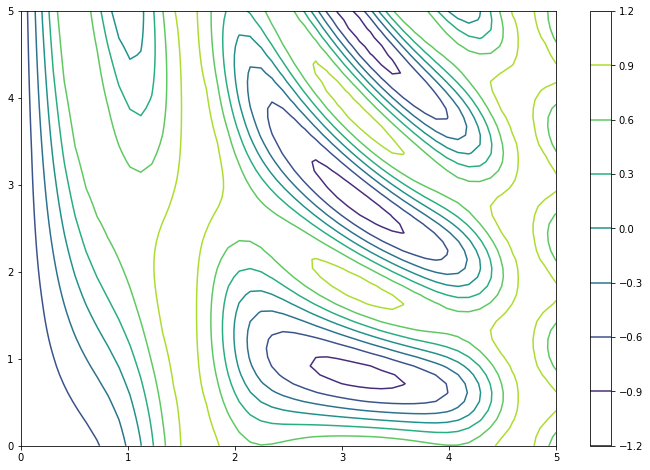

In [8]:
plt.figure(figsize=(12, 8))
plt.contour(X, Y, Z)
plt.colorbar()  

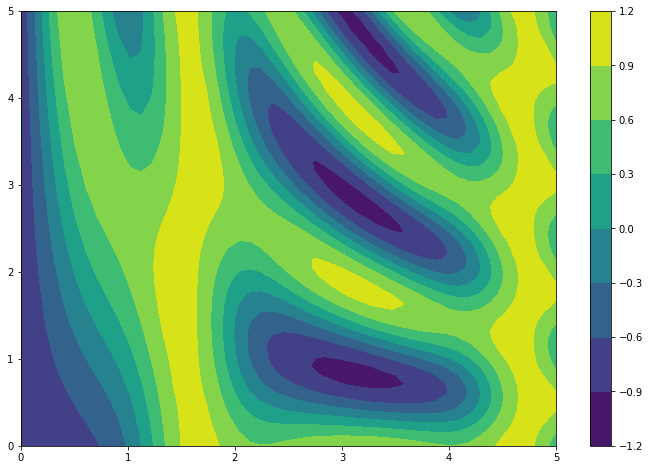

In [9]:
plt.figure(figsize=(12, 8))
plt.contourf(X, Y, Z)
plt.colorbar()

(0.0, 5.0, 0.0, 5.0)

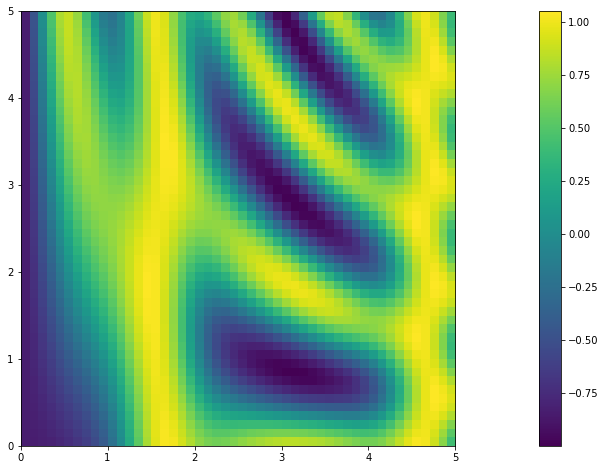

In [10]:
plt.figure(figsize=(12, 8))
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower')
plt.colorbar()
plt.axis('image')

/home/trierbo/miniconda3/envs/da/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([0.02972106, 0.03467457, 0.03962808, 0.0495351 , 0.07430266,
        0.10402372, 0.13869829, 0.17832638, 0.26748956, 0.29721063,
        0.34674573, 0.37646679, 0.35665275, 0.35665275, 0.41609488,
        0.39628084, 0.35665275, 0.24272201, 0.26253605, 0.16841936,
        0.15851233, 0.11888425, 0.04458159, 0.03962808, 0.02972106,
        0.01486053, 0.00990702, 0.01981404, 0.01486053, 0.00990702]),
 array([-2.68877042, -2.48689338, -2.28501635, -2.08313931, -1.88126228,
        -1.67938524, -1.47750821, -1.27563117, -1.07375414, -0.87187711,
        -0.67000007, -0.46812304, -0.266246  , -0.06436897,  0.13750807,
         0.3393851 ,  0.54126213,  0.74313917,  0.9450162 ,  1.14689324,
         1.34877027,  1.55064731,  1.75252434,  1.95440138,  2.15627841,
         2.35815544,  2.56003248,  2.76190951,  2.96378655,  3.16566358,
         3.36754062]),
 <a list of 1 Patch objects>)

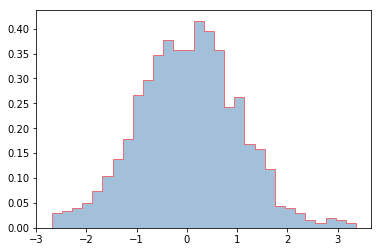

In [11]:
data = np.random.randn(1000)
plt.hist(data, bins=30, normed=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='red')

In [12]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

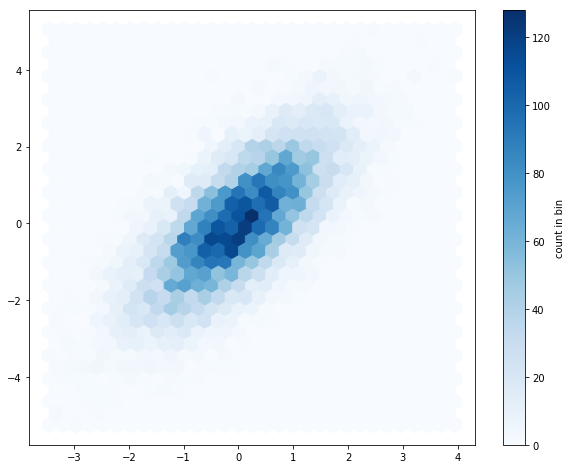

In [13]:
plt.figure(figsize=(10, 8))
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

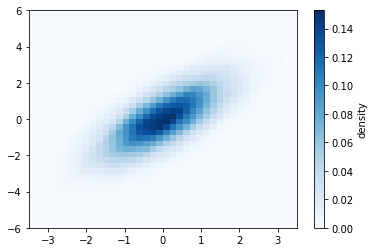

In [14]:
from scipy.stats import gaussian_kde

data = np.vstack([x, y])
kde = gaussian_kde(data)

xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

In [15]:
x = np.linspace(0, 10, 1000)
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))

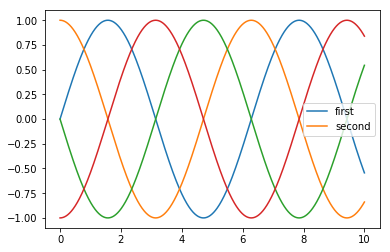

In [16]:
lines = plt.plot(x, y)
plt.legend(lines[:2], ['first', 'second'])

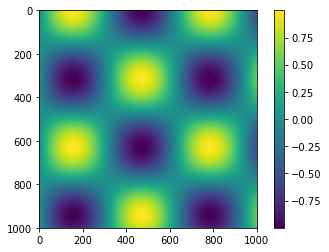

In [17]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])
plt.imshow(I, cmap='viridis')
plt.colorbar()

In [18]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """为配色方案显示灰度图"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    # 将RGBA色转换为不同亮度的灰度值
    # 参考链接http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)

def view_colormap(cmap):
    """用等价的灰度图表示配色方案"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    fig, ax = plt.subplots(2, figsize=(6, 2),
    subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

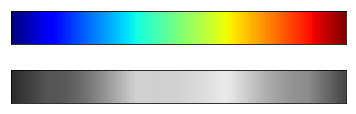

In [19]:
view_colormap('jet')

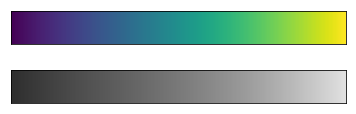

In [20]:
view_colormap('viridis')

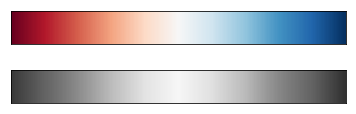

In [21]:
view_colormap('RdBu')

In [22]:
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

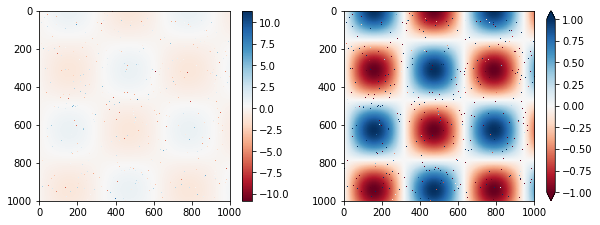

In [23]:
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

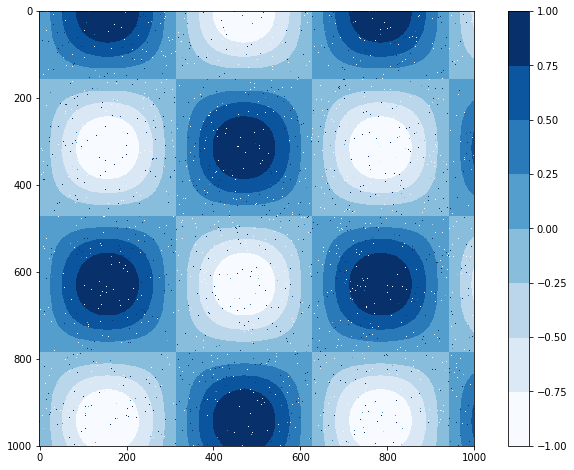

In [24]:
plt.figure(figsize=(12, 8))
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 8))
plt.colorbar()
plt.clim(-1, 1)

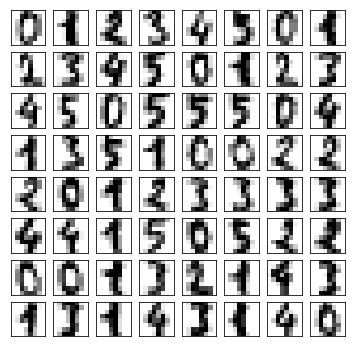

In [25]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [26]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

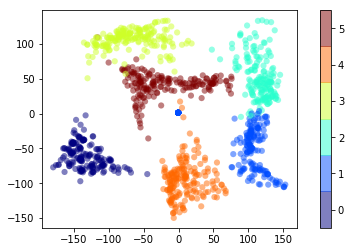

In [27]:
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1, alpha=0.5,
            c=digits.target, cmap=plt.cm.get_cmap('jet', 6))
plt.colorbar()
plt.axis('image')
plt.clim(-0.5, 5.5)